# **Heart Failure Prediction**

# **About Dataset**

**Cardiovascular diseases** (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

: 

In [6]:
df = pd.read_csv("heart.csv")

In [7]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# **EDA**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Sex , ChestpainType , RestingECG , ST_Slope  this are the columns has Object data type

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Find the null values in data


In [11]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [12]:
df.isnull().sum().sum()

0

In [13]:
## there is no null values in dataset


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def analyze_relationships(df, target_col='HeartDisease'):
    """
    Analyze relationships between features and target variable in the dataset.

    Parameters:
    df (pandas.DataFrame): The heart disease dataset
    target_col (str): Name of the target variable column
    """
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    results = {}

    # Analyze numerical variables
    for col in numerical_cols:
        if col != target_col:
            # Calculate correlation
            correlation = df[col].corr(df[target_col])

            # Perform t-test
            t_stat, p_value = stats.ttest_ind(
                df[df[target_col] == 1][col],
                df[df[target_col] == 0][col]
            )

            results[col] = {
                'type': 'numerical',
                'correlation': correlation,
                'p_value': p_value
            }

            # Create visualization
            plt.figure(figsize=(10, 5))

            # Box plot
            plt.subplot(1, 2, 1)
            sns.boxplot(x=target_col, y=col, data=df)
            plt.title(f'Box Plot: {col} vs {target_col}')

            # Distribution plot
            plt.subplot(1, 2, 2)
            sns.histplot(data=df, x=col, hue=target_col, multiple="dodge")
            plt.title(f'Distribution: {col} by {target_col}')

            plt.tight_layout()
            plt.show()

    # Analyze categorical variables
    for col in categorical_cols:
        if col != target_col:
            # Chi-square test
            contingency_table = pd.crosstab(df[col], df[target_col])
            chi2, p_value = stats.chi2_contingency(contingency_table)[:2]

            results[col] = {
                'type': 'categorical',
                'chi2': chi2,
                'p_value': p_value
            }

            # Create visualization
            plt.figure(figsize=(10, 5))

            # Bar plot
            plt.subplot(1, 2, 1)
            sns.countplot(data=df, x=col, hue=target_col)
            plt.xticks(rotation=45)
            plt.title(f'Count Plot: {col} vs {target_col}')

            # Stacked percentage plot
            plt.subplot(1, 2, 2)
            prop_data = (df.groupby(col)[target_col].value_counts(normalize=True)
                        .unstack())
            prop_data.plot(kind='bar', stacked=True)
            plt.title(f'Proportion Plot: {col} vs {target_col}')
            plt.xticks(rotation=45)

            plt.tight_layout()
            plt.show()

    return results

def print_analysis_summary(results):
    """
    Print a summary of the analysis results.
    """
    print("\nAnalysis Summary:")
    print("-" * 50)

    # Print numerical variable results
    print("\nNumerical Variables:")
    for var, stats in results.items():
        if stats['type'] == 'numerical':
            print(f"\n{var}:")
            print(f"Correlation with target: {stats['correlation']:.3f}")
            print(f"T-test p-value: {stats['p_value']:.3e}")

    # Print categorical variable results
    print("\nCategorical Variables:")
    for var, stats in results.items():
        if stats['type'] == 'categorical':
            print(f"\n{var}:")
            print(f"Chi-square statistic: {stats['chi2']:.3f}")
            print(f"Chi-square p-value: {stats['p_value']:.3e}")

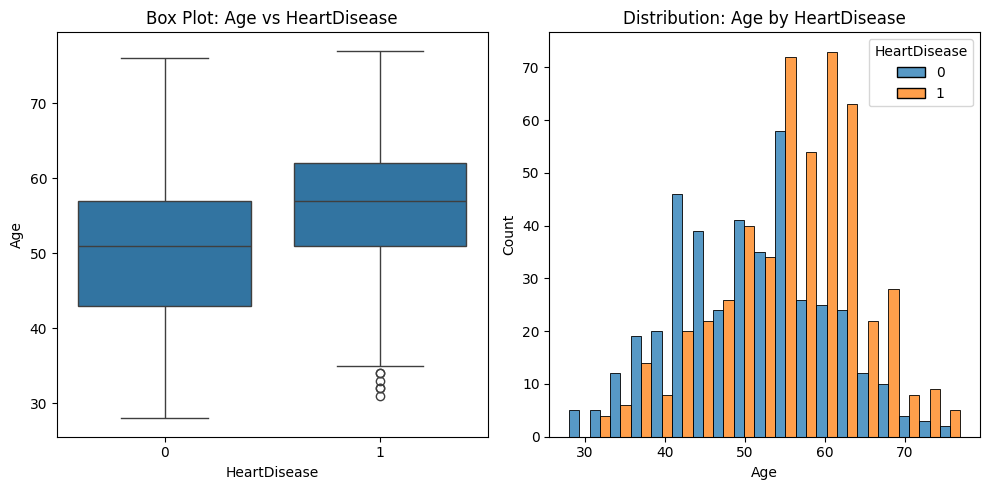

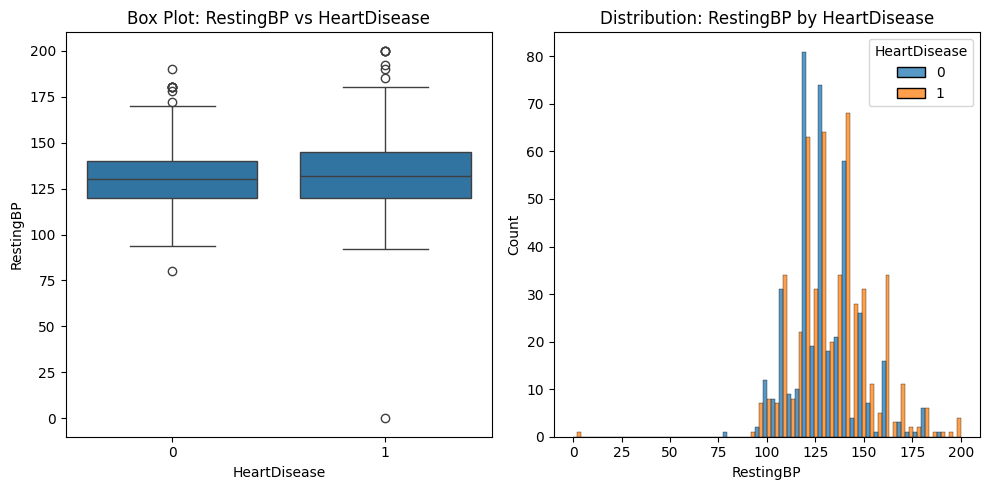

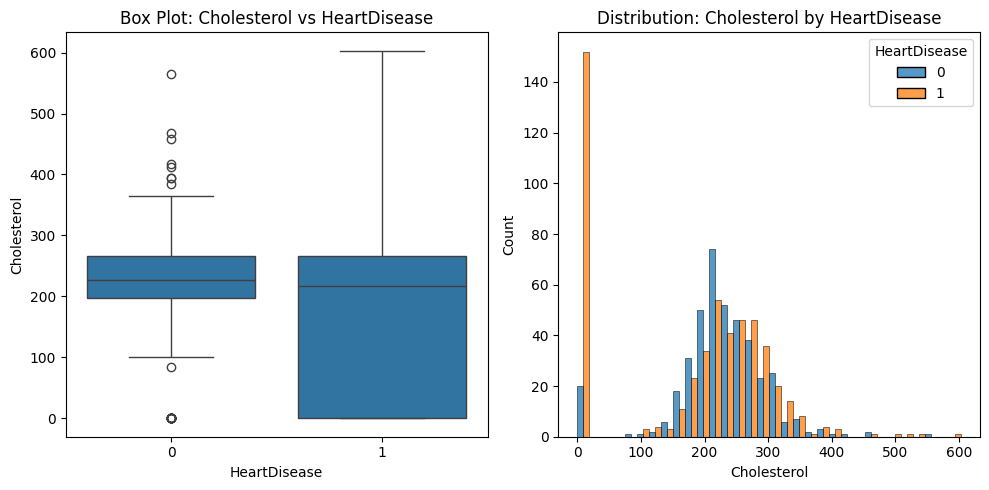

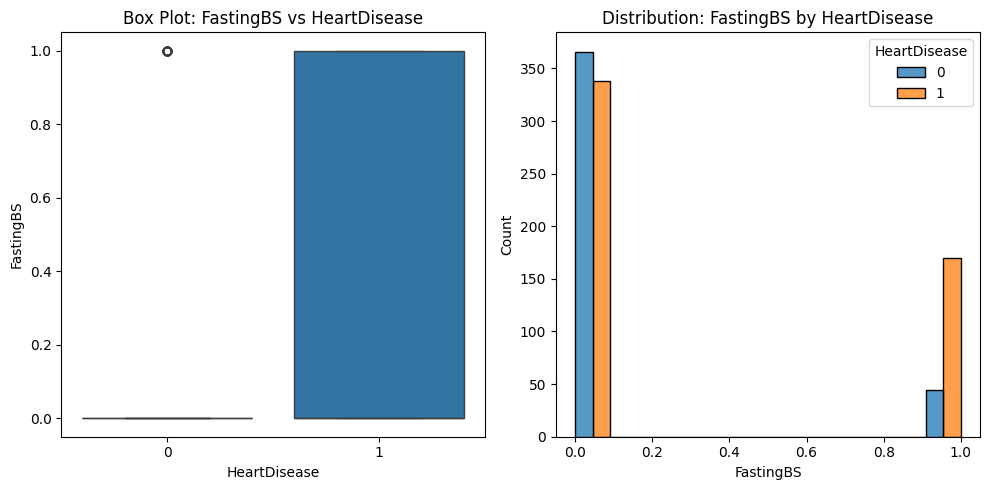

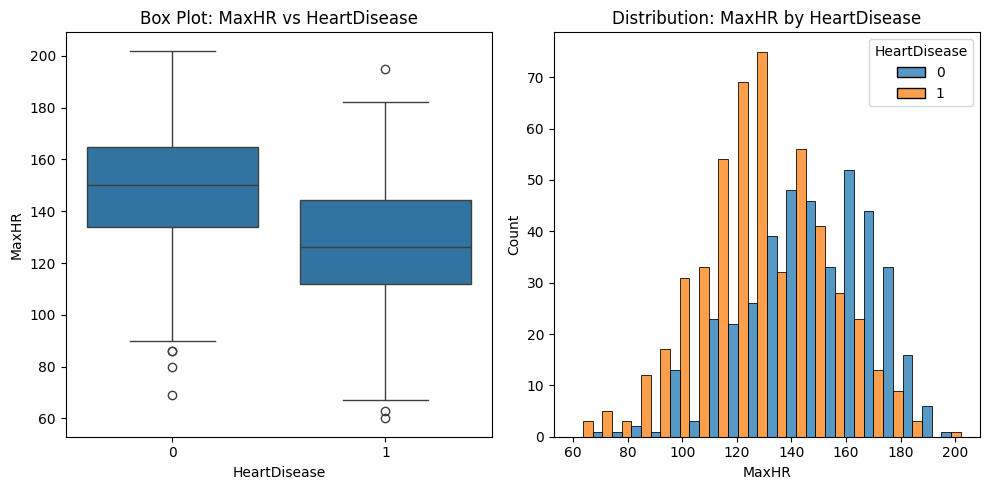

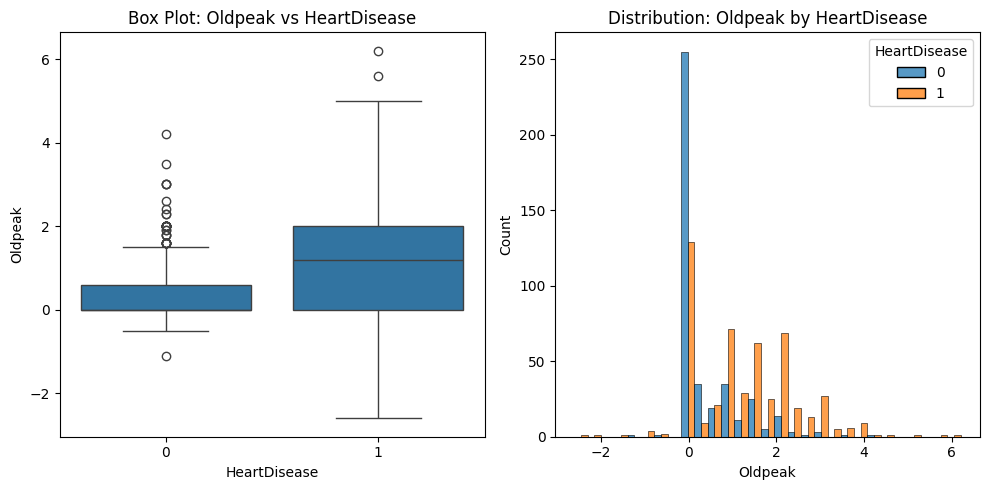

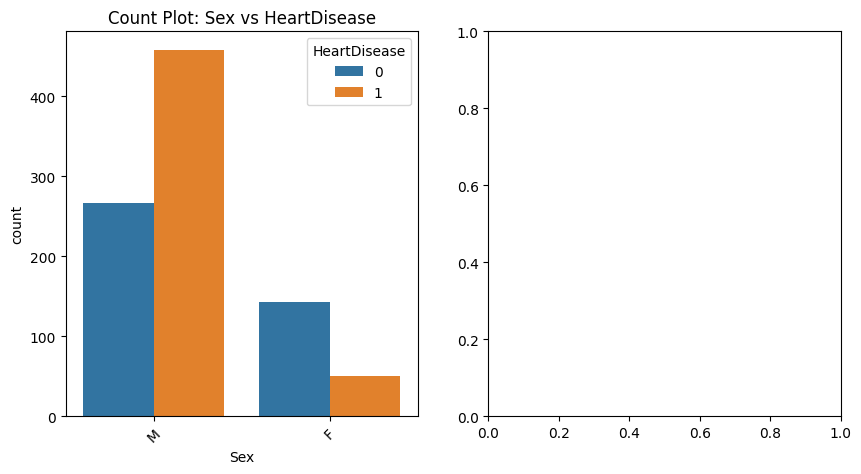

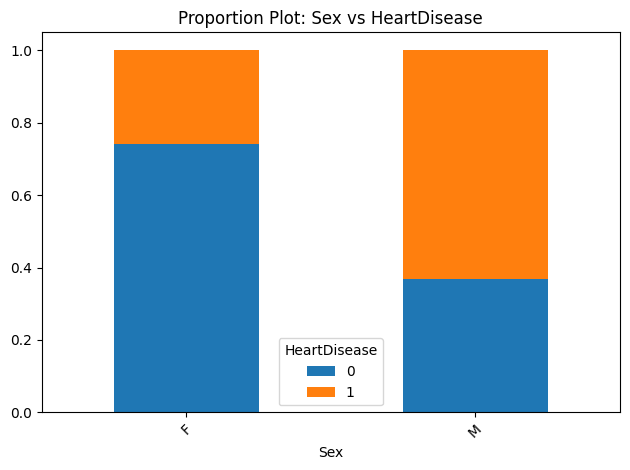

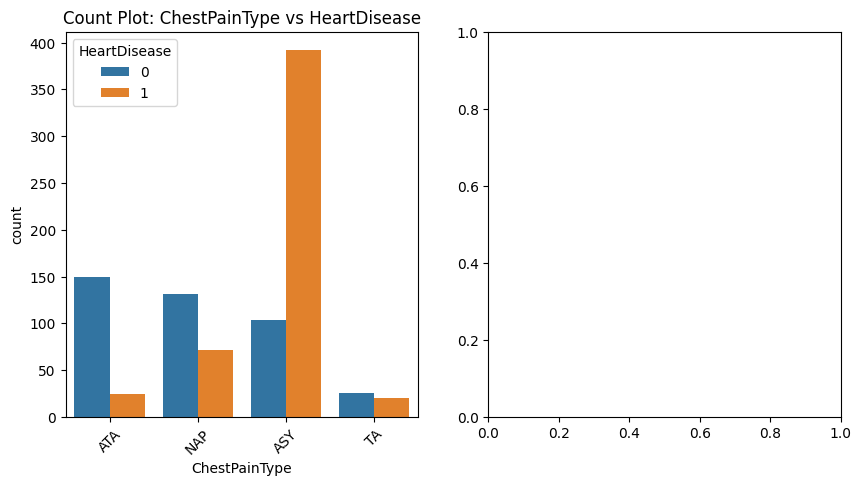

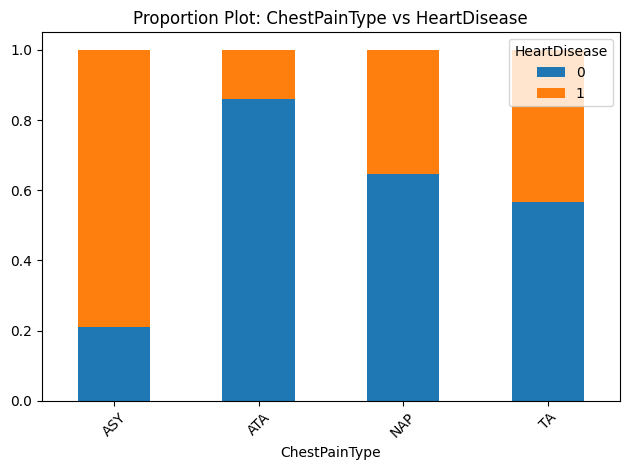

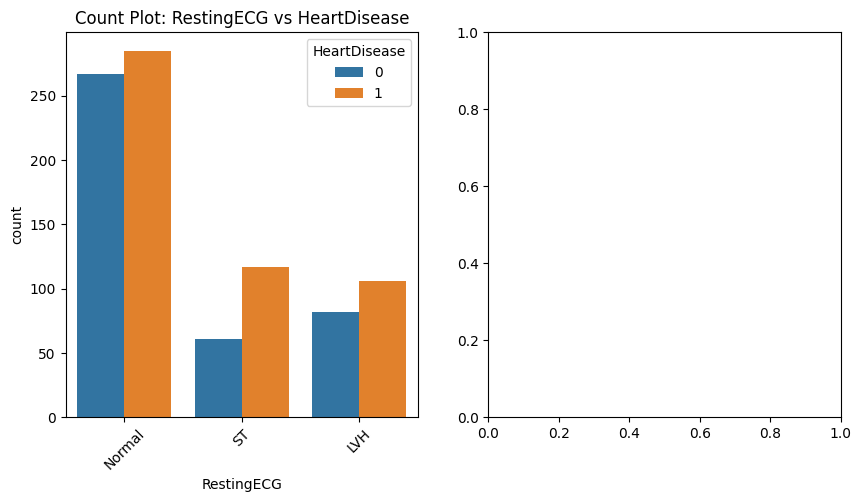

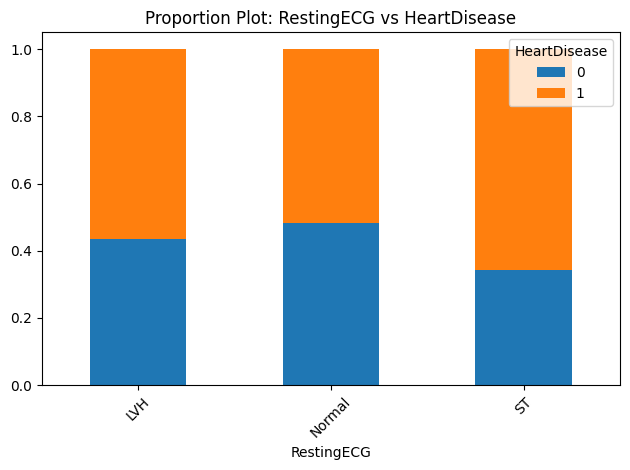

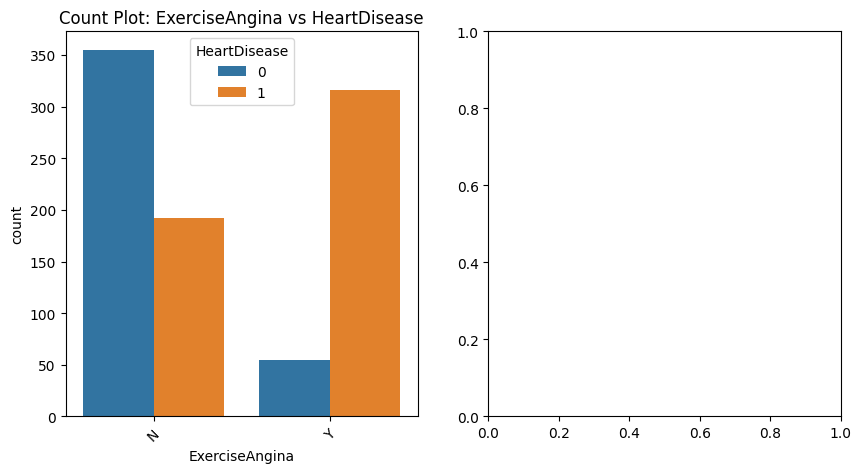

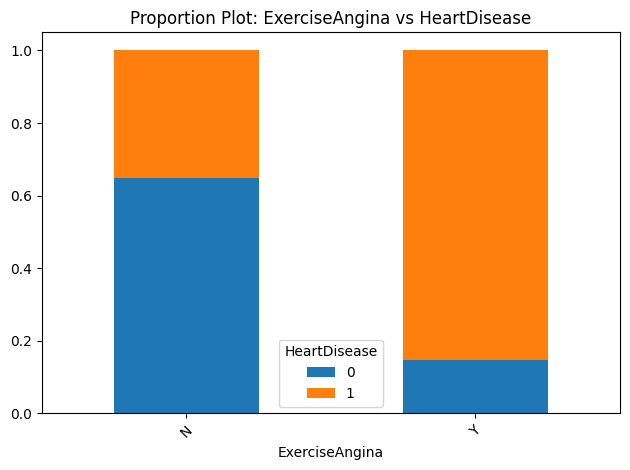

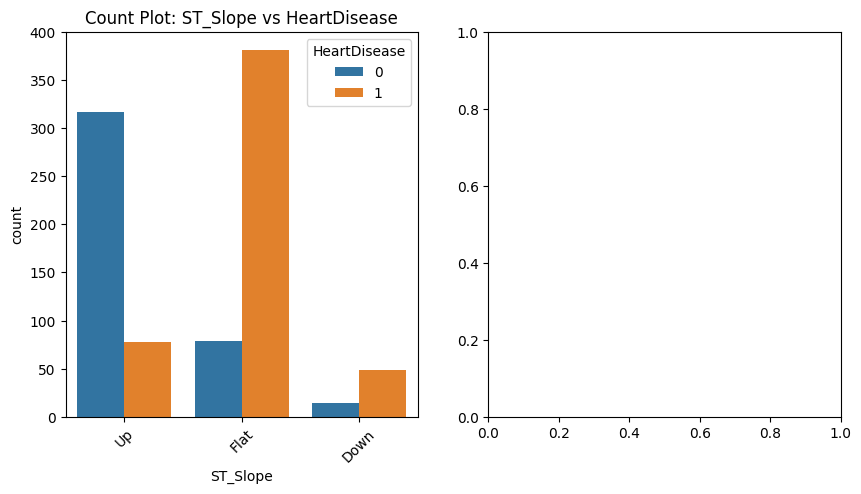

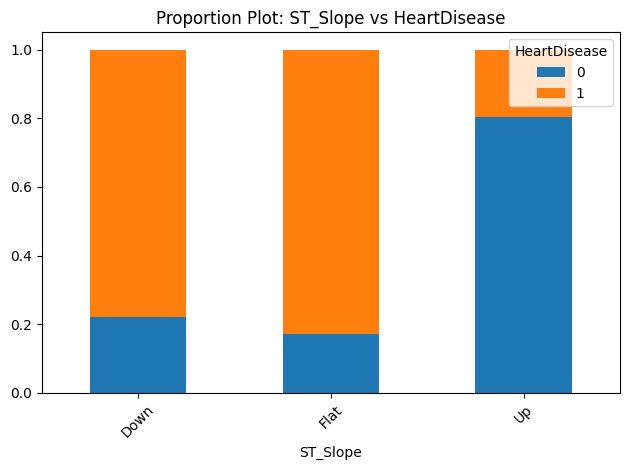


Analysis Summary:
--------------------------------------------------

Numerical Variables:

Age:
Correlation with target: 0.282
T-test p-value: 3.008e-18

RestingBP:
Correlation with target: 0.108
T-test p-value: 1.095e-03

Cholesterol:
Correlation with target: -0.233
T-test p-value: 9.308e-13

FastingBS:
Correlation with target: 0.267
T-test p-value: 1.754e-16

MaxHR:
Correlation with target: -0.400
T-test p-value: 1.138e-36

Oldpeak:
Correlation with target: 0.404
T-test p-value: 2.391e-37

Categorical Variables:

Sex:
Chi-square statistic: 84.145
Chi-square p-value: 4.598e-20

ChestPainType:
Chi-square statistic: 268.067
Chi-square p-value: 8.084e-58

RestingECG:
Chi-square statistic: 10.931
Chi-square p-value: 4.229e-03

ExerciseAngina:
Chi-square statistic: 222.259
Chi-square p-value: 2.908e-50

ST_Slope:
Chi-square statistic: 355.918
Chi-square p-value: 5.168e-78


In [15]:
# Run the analysis
results = analyze_relationships(df)

# Print the summary
print_analysis_summary(results)

**find the columns which have object data type**

In [16]:
# Find columns with object datatype
object_columns = df.select_dtypes(include='object').columns
print("Columns with object datatype:", object_columns)


Columns with object datatype: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [17]:
##  there are five features which have Object datatype  and we have to convert them into numerical formate to impliment machine learning algorithms

find all uniq values present in object datatype features

In [18]:
# List of columns with object datatype
object_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Loop through the columns and get unique values
unique_values = {col: df[col].unique() for col in object_columns}

# Display the unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'Sex': ['M' 'F']
Unique values in column 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
Unique values in column 'RestingECG': ['Normal' 'ST' 'LVH']
Unique values in column 'ExerciseAngina': ['N' 'Y']
Unique values in column 'ST_Slope': ['Up' 'Flat' 'Down']


**we will transform this features into numerical by selecting proper methods**

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [20]:
# 1. Transform 'Sex' (Binary categorical)
df['Sex'] = label_encoder.fit_transform(df['Sex'])


In [21]:
# 2. Transform 'ExerciseAngina' (Binary categorical)
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])

In [22]:
# 3. Transform 'RestingECG' (Ordinal categorical)
resting_ecg_mapping = {'Normal': 0, 'ST': 1, 'LVH': 2}
df['RestingECG'] = df['RestingECG'].map(resting_ecg_mapping)

In [23]:
# 4. Transform 'ST_Slope' (Ordinal categorical)
st_slope_mapping = {'Down': 0, 'Flat': 1, 'Up': 2}
df['ST_Slope'] = df['ST_Slope'].map(st_slope_mapping)

In [24]:
# 5. One-Hot Encoding for 'ChestPainType' (Nominal categorical)
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True)  # drop_first avoids multicollinearity


In [25]:
# Display the transformed DataFrame
print(df.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    1        140          289          0           0    172   
1   49    0        160          180          0           0    156   
2   37    1        130          283          0           1     98   
3   48    0        138          214          0           0    108   
4   54    1        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  ChestPainType_ATA  \
0               0      0.0         2             0               True   
1               0      1.0         1             1              False   
2               0      0.0         2             0               True   
3               1      1.5         1             1              False   
4               0      0.0         2             0              False   

   ChestPainType_NAP  ChestPainType_TA  
0              False             False  
1               True             False  
2              False   

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   RestingECG         918 non-null    int64  
 6   MaxHR              918 non-null    int64  
 7   ExerciseAngina     918 non-null    int64  
 8   Oldpeak            918 non-null    float64
 9   ST_Slope           918 non-null    int64  
 10  HeartDisease       918 non-null    int64  
 11  ChestPainType_ATA  918 non-null    bool   
 12  ChestPainType_NAP  918 non-null    bool   
 13  ChestPainType_TA   918 non-null    bool   
dtypes: bool(3), float64(1), int64(10)
memory usage: 81.7 KB


In [27]:
## all the Categorical features transformed into numerical

## data is ready to extract paterns

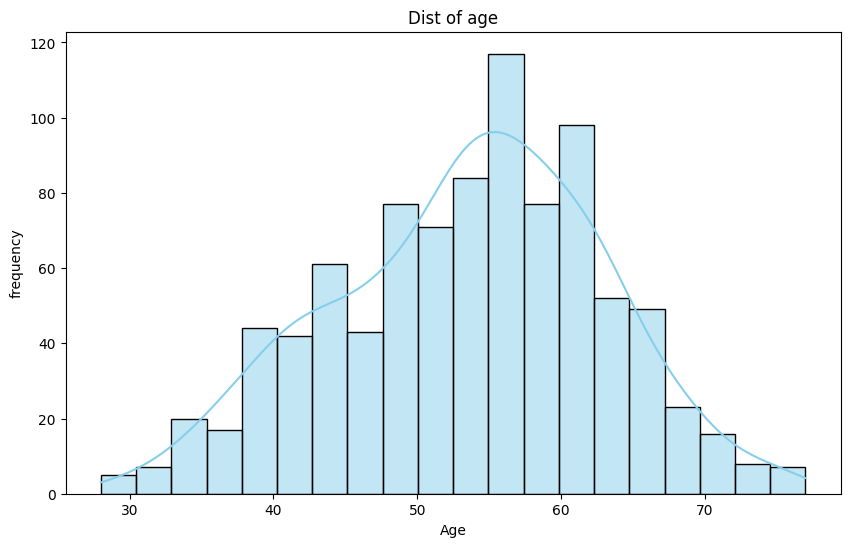

In [28]:
plt.figure(figsize = (10, 6))
sns.histplot(df['Age'].dropna(), kde = True, bins = 20, color = 'skyblue')
plt.title('Dist of age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

In [29]:
## most of people age range between 50-65
#insighst>> dist of age is right skewed little bit

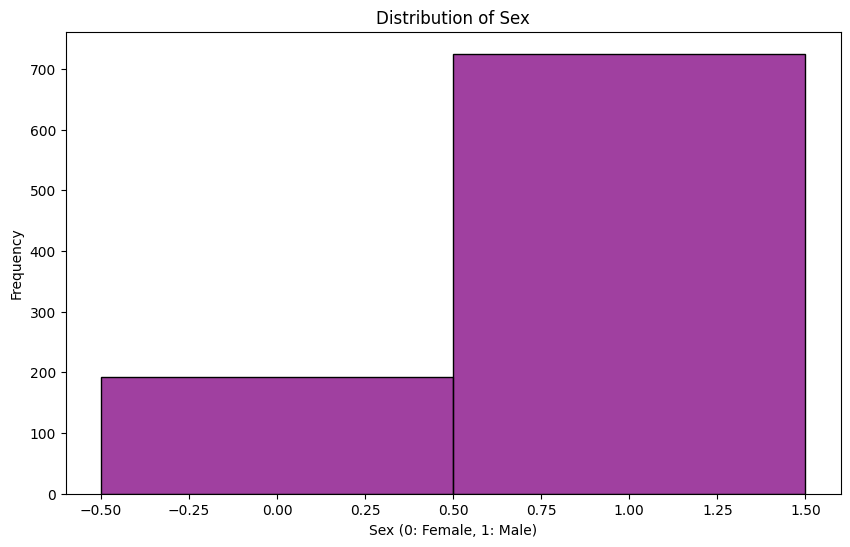

In [30]:
plt.figure(figsize=(10, 6))

# Plot histogram for the 'Sex' column
sns.histplot(df['Sex'].dropna(), bins=2, color='purple', discrete=True)

# Set title and labels
plt.title('Distribution of Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [31]:
## most of people are male

In [32]:
df.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA'],
      dtype='object')

<Axes: xlabel='ExerciseAngina', ylabel='count'>

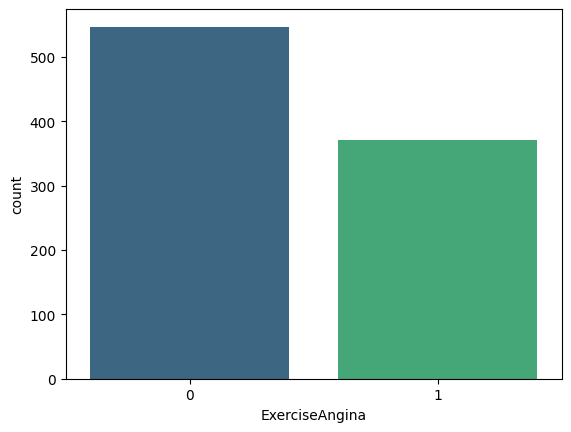

In [33]:
sns.countplot(x = 'ExerciseAngina', data = df, palette = 'viridis')

In [34]:
## peole who are doing chest exercise have chest pain

In [35]:
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

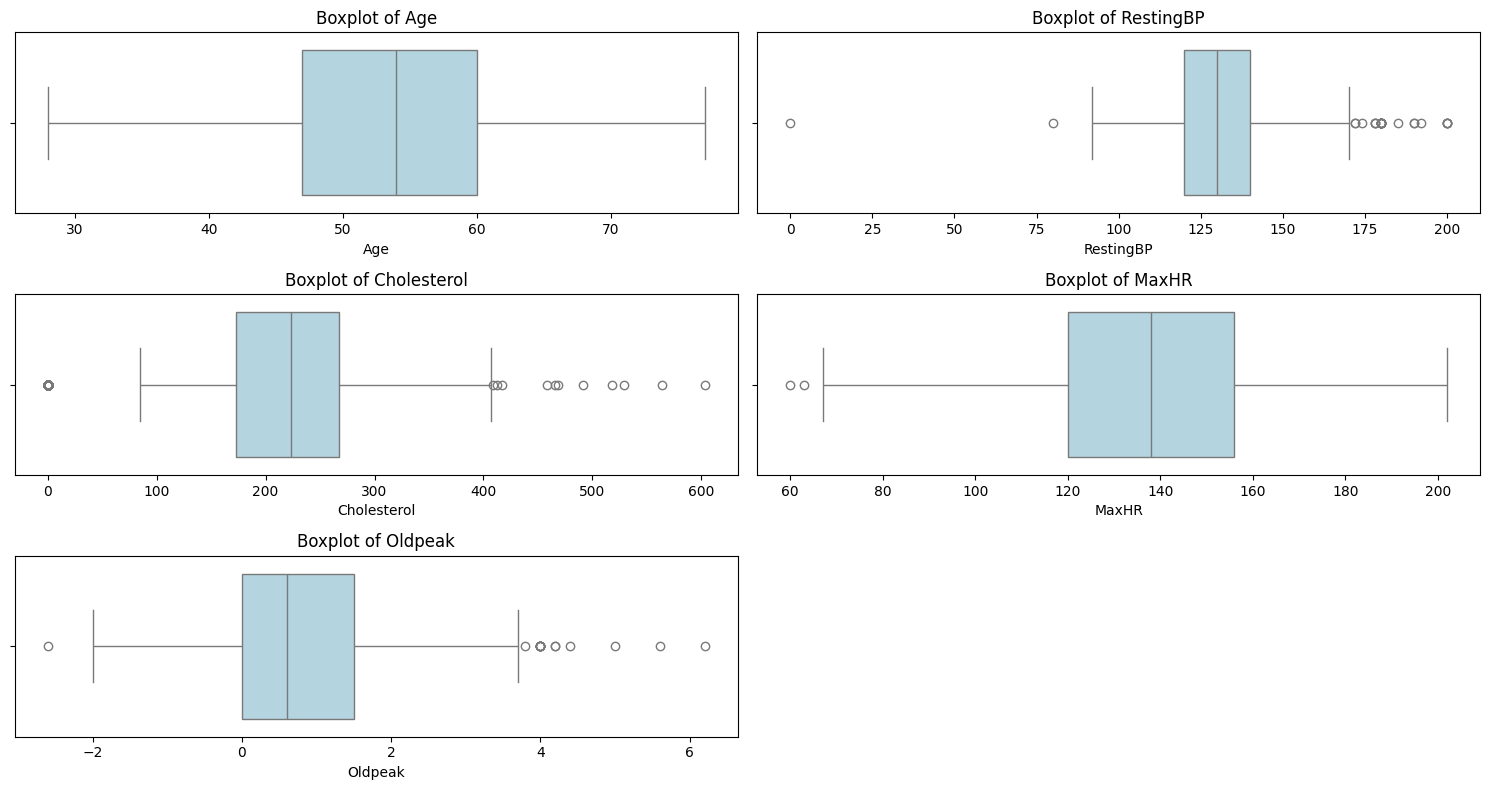

In [36]:
# Set up the plot (we'll plot each boxplot in a single row)
plt.figure(figsize=(15, 8))

# Create a boxplot for each numerical column
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)  # Arrange boxplots in a 2x3 grid
    sns.boxplot(data=df, x=column, color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

# Display all the boxplots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [37]:
## in cholesterol and Restingbp  have outliers


<Axes: ylabel='count'>

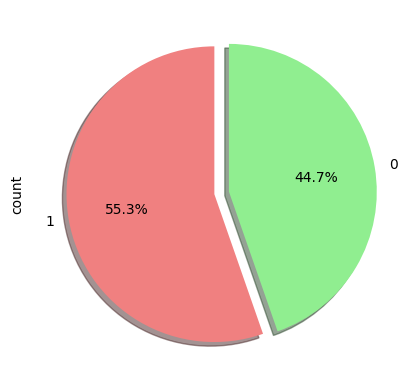

In [38]:
df.HeartDisease.value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], explode = (0, 0.1), startangle = 90, shadow = True)

In [39]:
## 55.3 % people have HartDisease and 44.7 % have not

<Axes: ylabel='count'>

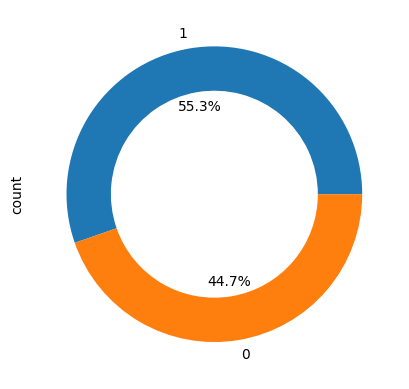

In [40]:
df['HeartDisease'].value_counts().plot.pie(autopct = "%1.1f%%", wedgeprops = dict(width=0.3))

In [41]:
df.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA'],
      dtype='object')

**check the correlation between veriables**

<Axes: >

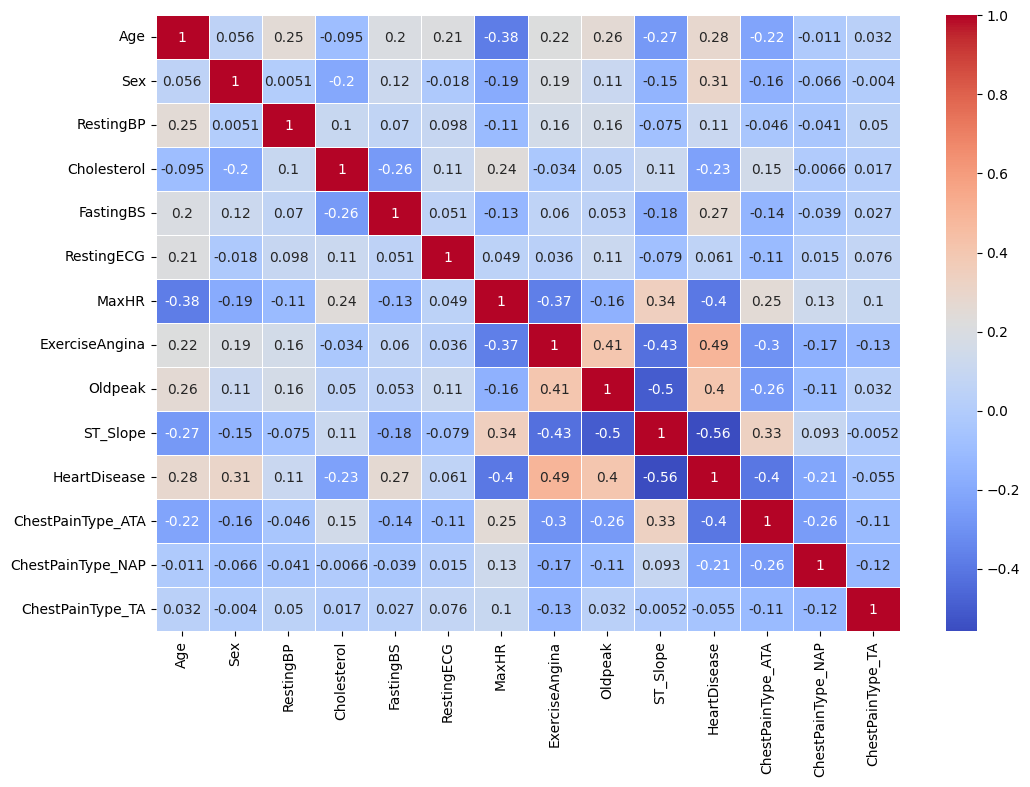

In [42]:
corr = df.corr(numeric_only=True)
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = .5)

In [43]:
### ExerciseAngina is highly correlate with HeartDisease

In [44]:
import pandas as pd

correlation_matrix = df.corr()


correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print(correlation_with_target)


HeartDisease         1.000000
ExerciseAngina       0.494282
Oldpeak              0.403951
Sex                  0.305445
Age                  0.282039
FastingBS            0.267291
RestingBP            0.107589
RestingECG           0.061011
ChestPainType_TA    -0.054790
ChestPainType_NAP   -0.212964
Cholesterol         -0.232741
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ST_Slope            -0.558771
Name: HeartDisease, dtype: float64


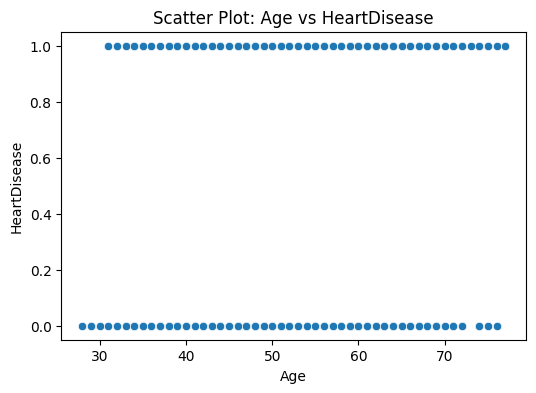

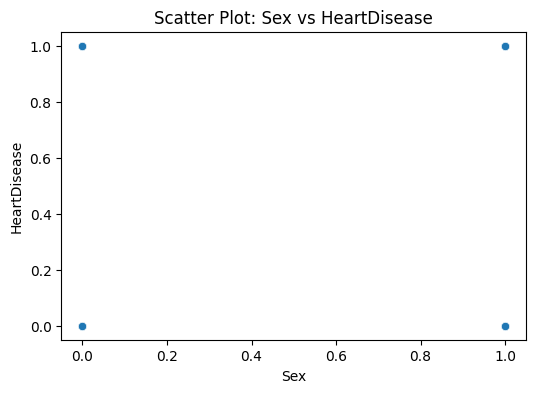

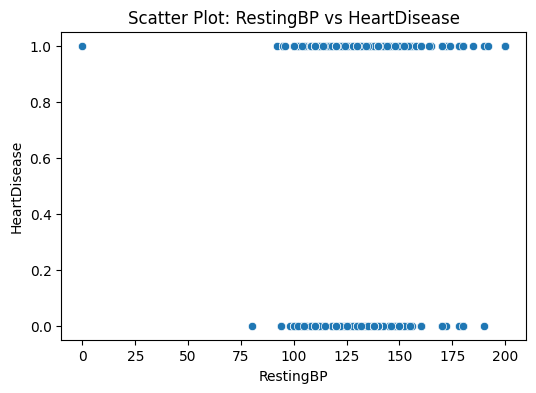

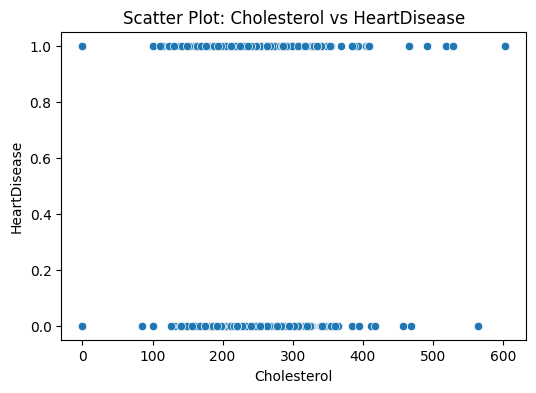

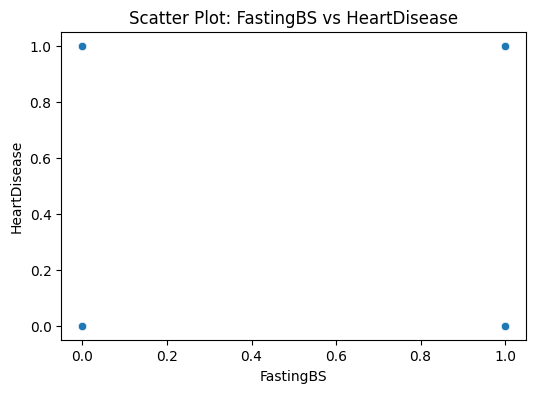

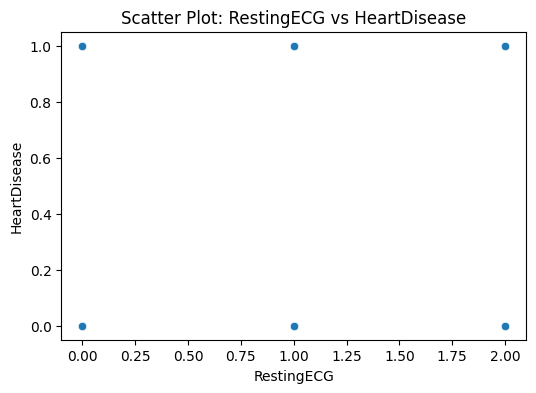

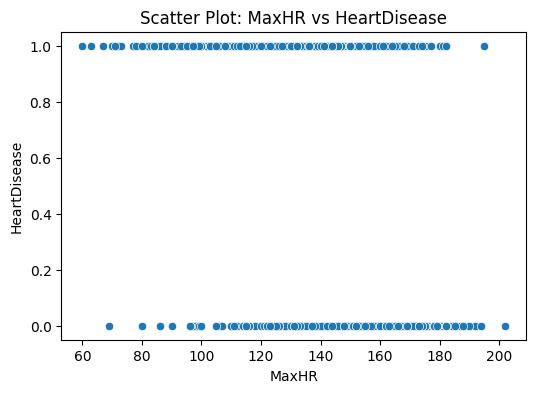

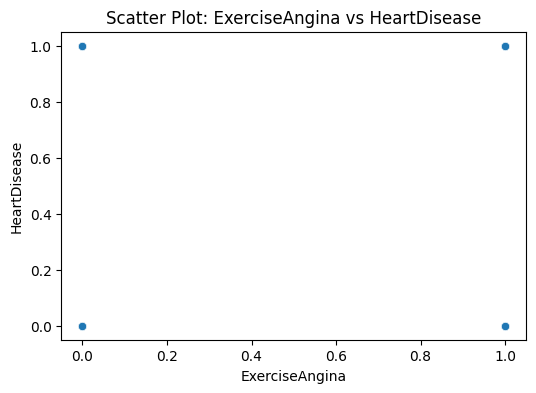

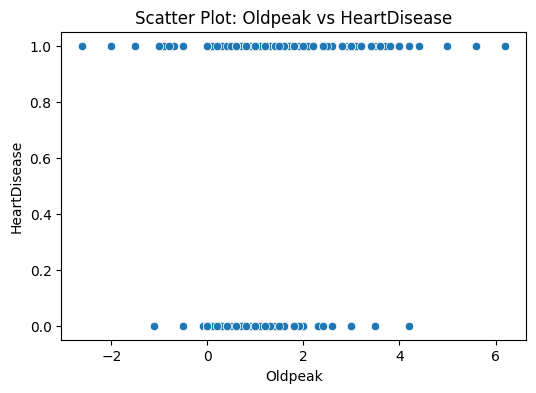

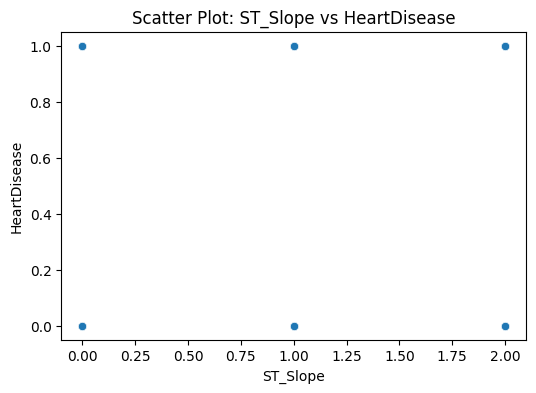

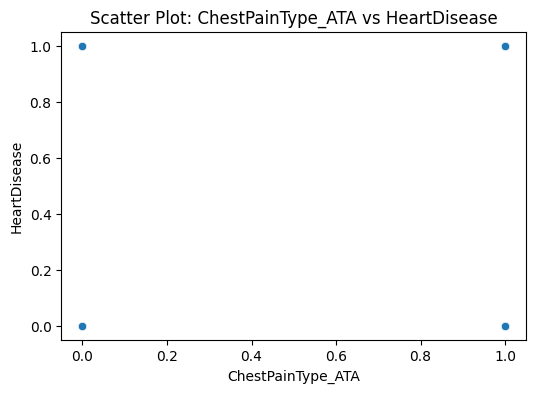

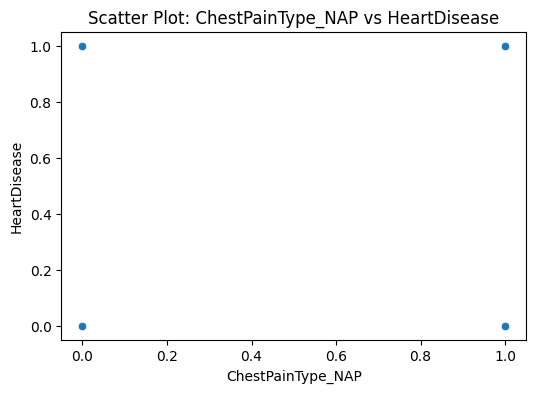

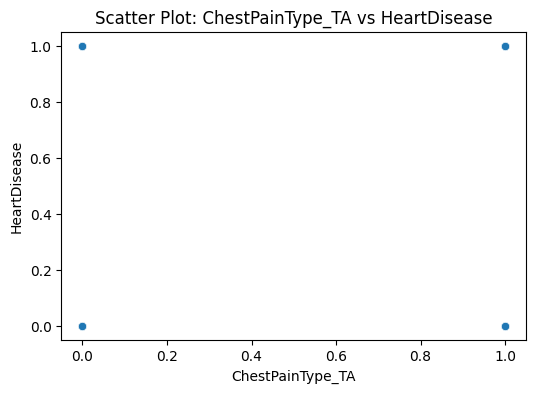

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting scatter plots for target vs independent variables
for column in df.columns:
    if column != 'HeartDisease':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=column, y='HeartDisease')
        plt.title(f"Scatter Plot: {column} vs HeartDisease")
        plt.xlabel(column)
        plt.ylabel("HeartDisease")
        plt.show()


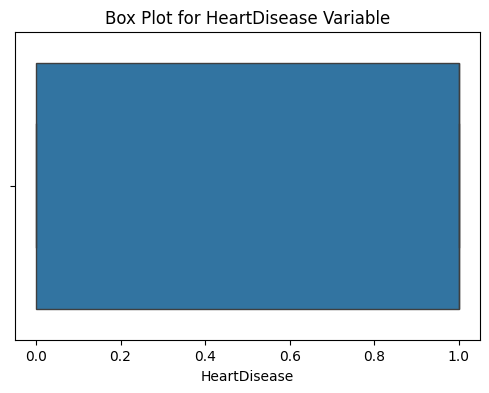

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'HeartDisease' is the target column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['HeartDisease'])
plt.title('Box Plot for HeartDisease Variable')
plt.show()


In [47]:
from scipy.stats import zscore

# Calculate Z-scores for the HeartDisease variable
z_scores = zscore(df['HeartDisease'])

# Identify outliers where Z-score > 3 or < -3
outliers = df[abs(z_scores) > 3]
print(f"Number of outliers based on Z-score: {len(outliers)}")
print(outliers)


Number of outliers based on Z-score: 0
Empty DataFrame
Columns: [Age, Sex, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease, ChestPainType_ATA, ChestPainType_NAP, ChestPainType_TA]
Index: []


In [48]:
## no outlier in HeartDisease

## **Model Training And Evaluation**

Since  target variable HeartDisease has no linear relationship with the independent variables, and  ensured that there are no outliers or issues in the data, a non-linear machine learning model might be more appropriate for dataset.  some of the best models that could be a good fit for this scenario:

**1. Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

[[66 11]
 [14 93]]


**2. Gradient Boosting Classifier**

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

[[68  9]
 [12 95]]


**3. Support Vector Machine (SVM)**

In [51]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # 'rbf' kernel is for non-linear data
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184

[[54 23]
 [35 72]]


**4. K-Nearest Neighbors (KNN)**

In [52]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.63      0.71      0.67        77
           1       0.77      0.70      0.74       107

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184

[[55 22]
 [32 75]]


**5. Neural Networks (MLP Classifier)**

In [53]:
from sklearn.neural_network import MLPClassifier

# Train the MLP model
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))


              precision    recall  f1-score   support

           0       0.79      0.81      0.80        77
           1       0.86      0.85      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

[[62 15]
 [16 91]]


**6. XGBoost (Extreme Gradient Boosting)**

In [54]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

[[67 10]
 [16 91]]


In [69]:
## we can go with  Gradient Boosting Classifier  by seeing F1-Score and Accuracy 89%

**create pipelines**